In [1]:
# Importa as bibliotecas necessárias
%run '~/git/Bibliotecas.ipynb'

# Importação

In [2]:
# Carrega a base de dados contendo os registros de importação de fertilizantes
q=pd.read_csv('~/git/Pricing-Fertilizer-take-Rains-into-account/temp/q.csv')
q

,kton,mm,date,CO_MES_1,CO_MES_2,CO_MES_3,CO_MES_4,CO_MES_5,CO_MES_6,CO_MES_7,...,CO_MES_10,CO_MES_11,CO_MES_12,kton_pred_mm,kton_pred_s_mm,ad,train_size_anos,md,erro_mm,erro_s_mm
0,53.557361,0.4,1185926400000000000,False,False,False,False,False,False,False,...,False,False,False,48,61,7,5.0,NaN,5.557361,7.442639
1,50.424205,0.3,1188604800000000000,False,False,False,False,False,False,False,...,False,False,False,57,63,7,5.0,NaN,6.575795,12.575795
2,79.445819,0.0,1191196800000000000,False,False,False,False,False,False,False,...,True,False,False,42,57,7,5.0,NaN,37.445819,22.445819
3,56.522721,8.8,1193875200000000000,False,False,False,False,False,False,False,...,False,True,False,69,65,7,5.0,NaN,12.477279,8.477279
4,40.785987,0.4,1196467200000000000,False,False,False,False,False,False,False,...,False,False,True,57,59,7,5.0,NaN,16.214013,18.214013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,240.914358,19.9,1696118400000000000,False,False,False,False,False,False,False,...,True,False,False,133,136,8,8.0,1.0,107.914358,104.914358
1424,90.119779,83.2,1698796800000000000,False,False,False,False,False,False,False,...,False,True,False,163,178,8,5.0,1.0,72.880221,87.880221
1425,90.119779,83.2,1698796800000000000,False,False,False,False,False,False,False,...,False,True,False,141,141,8,8.0,1.0,50.880221,50.880221
1426,128.496690,50.5,1701388800000000000,False,False,False,False,False,False,False,...,False,False,True,145,151,8,5.0,1.0,16.503310,22.503310


In [3]:
q['dif']=q.erro_s_mm-q.erro_mm

In [4]:
q.dif.mean()

3.557735054621849

In [5]:
q.date=pd.to_datetime(q.date)

In [6]:
q['CO_ANO']=q.date.dt.year

In [7]:
q['CO_MES']=q.date.dt.month

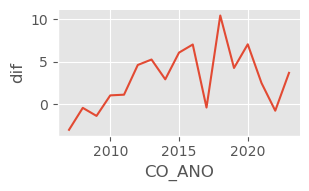

In [8]:
plt.style.use('ggplot')
sns.relplot(data=q.groupby('CO_ANO').dif.mean().reset_index(),x='CO_ANO',y='dif',kind='line',height=2,aspect=1.6)

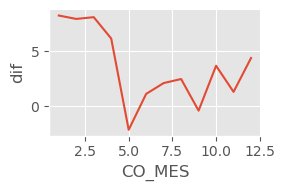

In [9]:
sns.relplot(data=q.groupby('CO_MES').dif.mean().reset_index(),x='CO_MES',y='dif',kind='line',height=2,aspect=1.6)

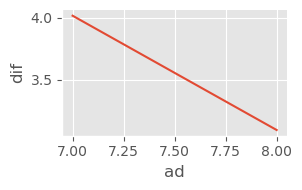

In [10]:
sns.relplot(data=q.groupby('ad').dif.mean().reset_index(),x='ad',y='dif',kind='line',height=2,aspect=1.6)

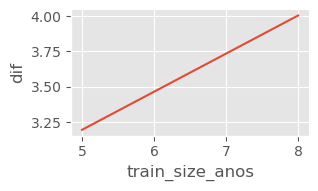

In [11]:
sns.relplot(data=q.groupby('train_size_anos').dif.mean().reset_index(),x='train_size_anos',y='dif',kind='line',height=2,aspect=1.6)

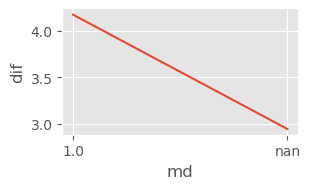

In [12]:
q.md=q.md.astype(str)
sns.relplot(data=q.groupby('md').dif.mean().reset_index(),x='md',y='dif',kind='line',height=2,aspect=1.6)

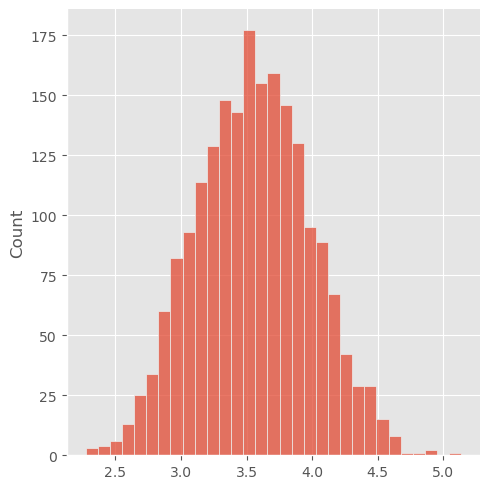

In [13]:
import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(2000):
    so_boot_distn.append(q.sample(frac=1, replace=True)['dif'].mean())

sns.displot(so_boot_distn)

In [14]:
m=np.mean(so_boot_distn)
s=np.std(so_boot_distn)

In [15]:
z_score=(0-m)/s
z_score

-8.220717167480101

In [16]:
from scipy.stats import norm

In [17]:
1-norm.cdf(z_score,loc=0,scale=1)

0.9999999999999999